In [146]:
# Description: This program uses an artifictial recural neural network called long short memorty (LSTM)
#               to predict the closing stock price of a corporation (Appla Inc) using the past 60 days stock price.

In [147]:
!pip install pandas_datareader

In [148]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [149]:
#Get the stock quote
df = web.DataReader('MSFT',data_source='stooq',start='2012-01-01',end='2019-12-17')

In [150]:
df = df[::-1]
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,21.2343,21.6175,21.1648,21.4576,8.072523e+07
2012-01-04,21.5083,22.0284,21.4745,21.9689,1.004093e+08
2012-01-05,21.9620,22.2399,21.8845,22.1972,6.993688e+07
2012-01-06,22.1049,22.6043,22.0721,22.5328,1.240285e+08
2012-01-09,22.4911,22.5328,22.2301,22.2468,7.445802e+07
...,...,...,...,...,...
2019-12-11,147.3360,147.6440,146.1550,147.4850,1.939965e+07
2019-12-12,147.4450,149.1630,146.8290,148.9640,2.535056e+07
2019-12-13,148.7460,150.5930,148.5670,150.2350,2.453249e+07


In [151]:
df.shape

(2003, 5)

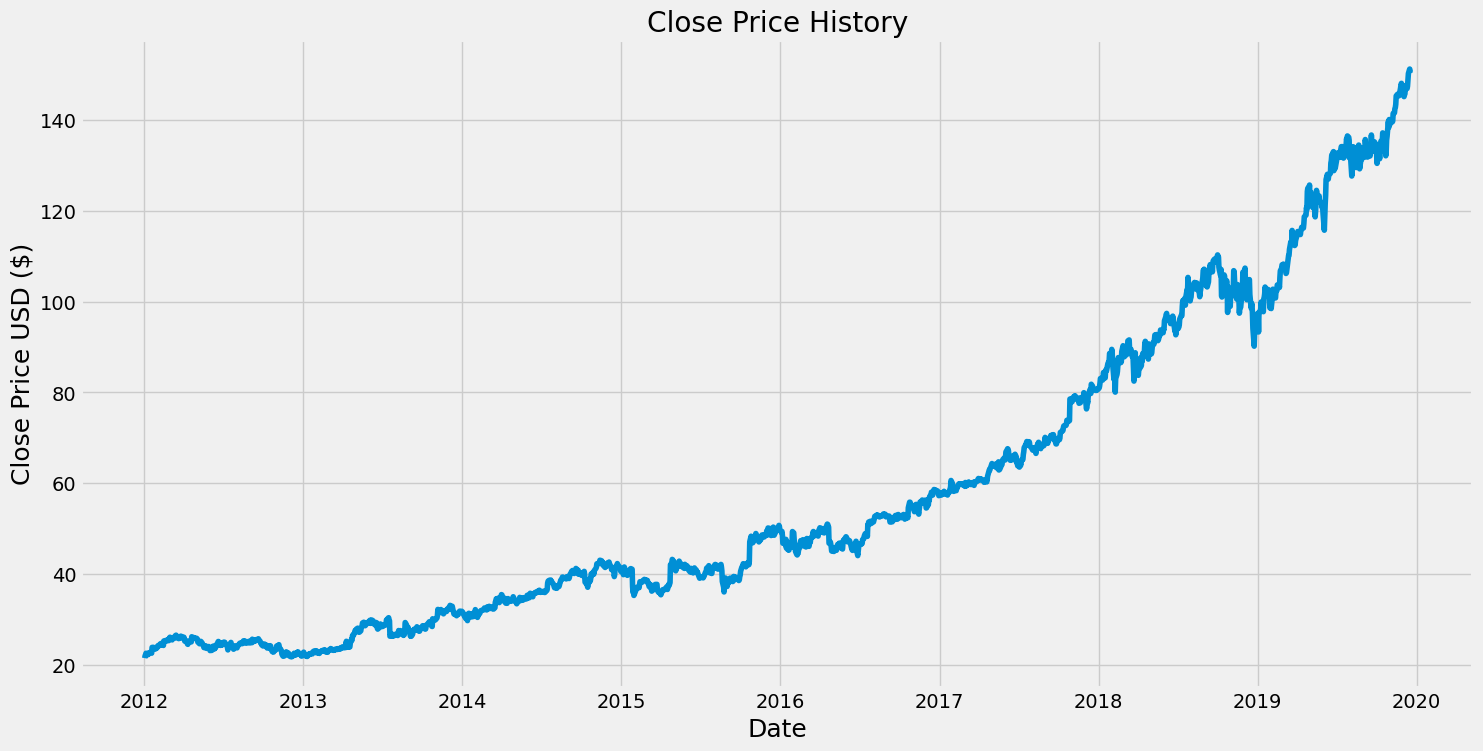

In [152]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [153]:
#Create a new df with only the close column
data=df.filter(['Close'])
#Convert the df to a numpy array
dataset=data.values
#get the number of rows to train the model on
training_datal_len=math.ceil(len(dataset)* .8)
training_datal_len

1603

In [154]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00394004],
       [0.0056993 ],
       ...,
       [0.99234802],
       [1.        ],
       [0.99357326]])

In [155]:
#Create the trainig dataset
#Create the scaled training dataset
train_data=scaled_data[0:training_datal_len,:]

#Split data into x_train and y_train data_sets
x_train=[]
y_train =[]

for i in range(60,len(train_data)):    #we choose 60 for indexing for the 60 past days
  x_train.append(train_data[i-60:i,0])  #the x_train will  contain 60 values indexed from position 0 to 59
  y_train.append(train_data[i,0])       #the y_train will contain 60 first values from position 60
  if i<=61 :
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.00394004, 0.0056993 , 0.0082854 , 0.00608151,
       0.00667872, 0.00595976, 0.00767278, 0.00924171, 0.00926482,
       0.00910377, 0.00840022, 0.01824607, 0.01834548, 0.01595818,
       0.01732753, 0.01695225, 0.01527698, 0.0176034 , 0.0171526 ,
       0.01937036, 0.01971482, 0.02148949, 0.02124521, 0.02218534,
       0.02410642, 0.02477221, 0.02311929, 0.02361633, 0.0228126 ,
       0.02154266, 0.02920851, 0.0290097 , 0.03021876, 0.02913993,
       0.02978183, 0.03046303, 0.02964466, 0.03288809, 0.03203889,
       0.03551195, 0.03418114, 0.03246041, 0.03093001, 0.03271239,
       0.0337604 , 0.03362246, 0.03392915, 0.03784607, 0.03851109,
       0.03897037, 0.03741685, 0.03493169, 0.03362246, 0.03314084,
       0.03369875, 0.0337604 , 0.03734827, 0.03691212, 0.03486234])]
[0.03444082780048455]

[array([0.        , 0.00394004, 0.0056993 , 0.0082854 , 0.00608151,
       0.00667872, 0.00595976, 0.00767278, 0.00924171, 0.00926482,
       0.00910377, 0.00840022, 0.01

In [156]:
#Convert the x_train and y_train to the numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

#reshape the data (LSTM expect the data to be 3 dimensional although our data now is 2 dimensional)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))    #1 is the number of features which is the close
x_train.shape

(1543, 60, 1)

In [157]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))  #add the lstm layer and give it 50 neurones , the true return_sequences is because we are gonna use another layehr of lstm
model.add(LSTM(50, return_sequences=False))     #add second lstm layer of 50 neurones , false is because we are not gonna use any other lstm layer for our model
model.add(Dense(25)) #add dense layer of 25 neurones
model.add(Dense(1))  #add another layer of danse of 1 neurone

In [158]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error') #give the model a loss function to evaluate the training

In [159]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1) #batch size is the total number of training examples present in a single batch
                                                  #epochs is the number of iteration when our entire data is passed forward and backward through a neural network

1543/1543 [==============================] - 59s 36ms/step - loss: 5.2892e-04


In [160]:
#Create the testing dataset
#Create a new array containing scaled value from index 1543 to 2003
test_data=scaled_data[training_datal_len-60: , :]
#create data sets x_test and y_test
x_test= []
y_test=dataset[training_datal_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [161]:
#Convert data into numpy
x_test = np.array(x_test)

In [162]:
#reshape data to prepare for LSTM
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [163]:
#Predict the value of the price values
predictions=model.predict(x_test)
predictions =scaler.inverse_transform(predictions)


13/13 [==============================] - 1s 24ms/step


In [164]:
#get the root mean squared eroor (RMSE)
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.258163087982178

<ipython-input-165-3d180729a641>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


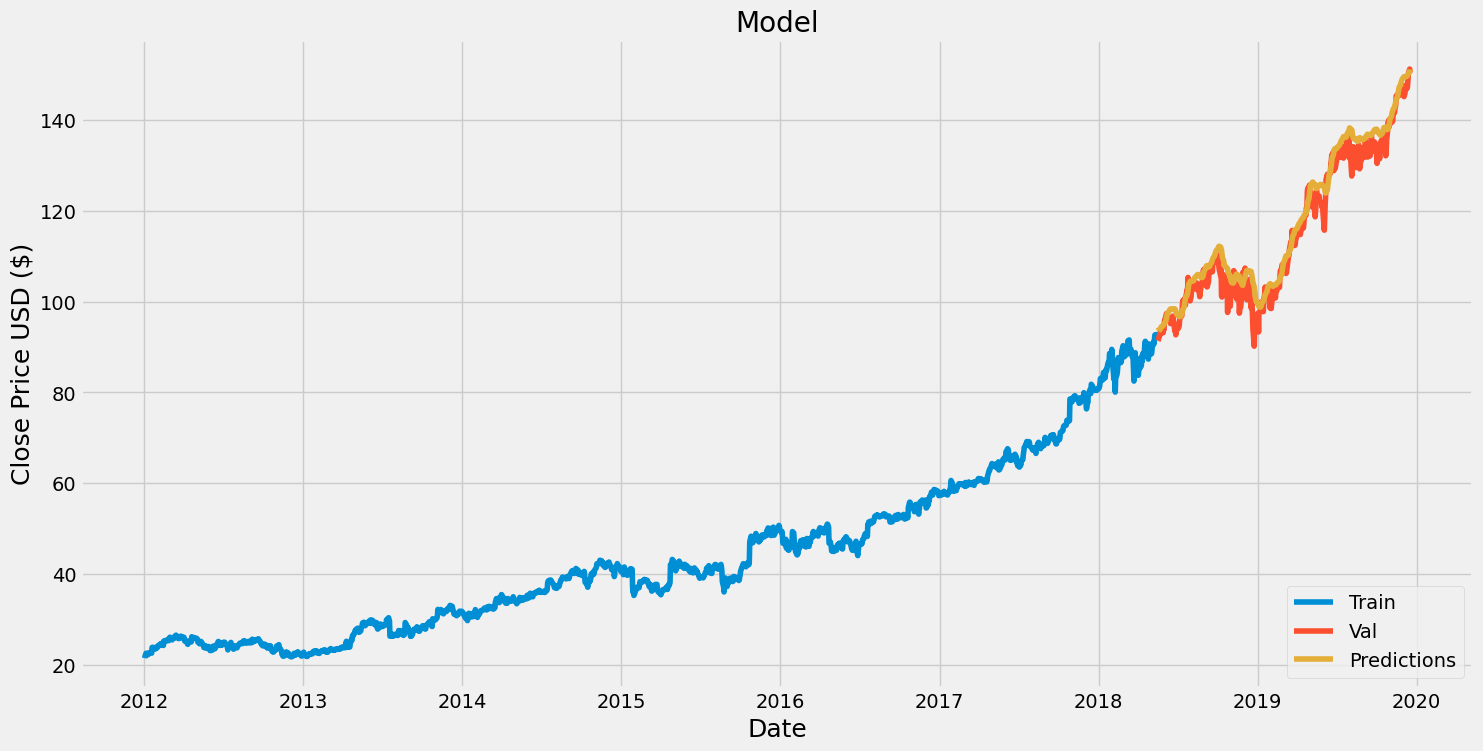

In [165]:
#plot the data
train =  data[:training_datal_len]
valid = data[training_datal_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [166]:
valid

,Close,Predictions
Date,,
2018-05-17,91.3940,93.556770
2018-05-18,91.5658,93.699280
2018-05-21,92.7421,93.778374
2018-05-22,92.6478,93.909119
2018-05-23,93.7528,94.047791
...,...,...
2019-12-11,147.4850,149.820450
2019-12-12,148.9640,149.962463
2019-12-13,150.2350,150.225342


In [167]:
#get the quote
apple_quote=web.DataReader('MSFT',data_source = 'stooq',start='2012-01-01',end='2019-12-17')
apple_quote=apple_quote[::-1]
#create new df
new_df = apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert df to array
last_60_days = new_df[-60:].values
#scale data to values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
#create empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)

#prepare for LSTM
#convert the X_test data set to numpy array
X_test=np.array(X_test)
#reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#LSTM
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 27ms/step
[[148.8396]]


In [168]:
apple_quote_2=web.DataReader('AAPL',data_source = 'stooq',start='2019-12-18',end='2019-12-18')
print(apple_quote_2['Close'])

Date
2019-12-18    68.516
Name: Close, dtype: float64
